In [4]:
# Dataset from: https://www.kdd.org/kdd-cup/view/kdd-cup-2004/Data

# target: whether a protein is homologous to a target protein

# variables: 74. The features describe the match (e.g. the score of a sequence alignment) between the native protein sequence and the sequence that is tested for homology.

In [7]:
import pandas as pd
from imblearn.datasets import fetch_datasets

# load data
data = fetch_datasets()['protein_homo']

# prepare data in a pandas dataframe
data = pd.concat([
    pd.DataFrame(data.data),
    pd.Series(data.target)
], axis=1)

# add column names
col_names = [str(i) for i in range(74)] +['target']
data.columns = col_names

# display
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [10]:
data.to_csv('kdd2004.csv', index=False)

In [13]:
# from google.colab import files
# files.download('kdd2004.csv')

In [12]:
data['target'] = data['target'].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [18]:
print('data size',data.shape)

print('imbalanced target:','\n',data.target.value_counts() / len(data))

data size (145751, 75)
imbalanced target: 
 0    0.991108
1    0.008892
Name: target, dtype: float64


In [20]:
# separate dataset into train and test
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [21]:
# Baseline prediction: predict the majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [22]:
#ML models
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)
rf.fit(X_train, y_train)
y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [23]:
logit = LogisticRegression(random_state=0,  max_iter=1000)
logit.fit(X_train, y_train)
y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Accuracy
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
print('Accuracy Logistic Regression test:', accuracy_score(y_test, logit.predict(X_test)))

Accuracy Baseline test:  0.9907377761514888
Accuracy Random Forest test: 0.9962951104605955
Accuracy Logistic Regression test: 0.9969354617390112


We can see that machine learning models add only a tiny bit of performance compared to the baseline

In [25]:
#Percentage of the minority class that was correctly classified
def return_minority_perc(y_true, y_pred):
    minority_total = np.sum(y_true)
    minority_correct = np.sum(np.where((y_true==1)&(y_pred==1),1,0))
    return minority_correct / minority_total *100

In [26]:
print('% minority correctly classified, Baseline test: ', return_minority_perc(y_test, y_test_base))
print('% minority correctly classified, Random Forest test:', return_minority_perc(y_test, rf.predict(X_test)))
print('% minority correctly classified, Regression test:', return_minority_perc(y_test, logit.predict(X_test)))

% minority correctly classified, Baseline test:  0.0
% minority correctly classified, Random Forest test: 60.24691358024692
% minority correctly classified, Regression test: 71.11111111111111


However, we see that the baseline does not classify correctly any observation from the minority class, while the machine learning models do

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
)

In [29]:
#F1 score
print('F-measure Baseline test: ', f1_score(y_test, y_test_base, pos_label=1))
print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test), pos_label=1))
print('F-measure Logistic Regression test:', f1_score(y_test, logit.predict(X_test), pos_label=1))

F-measure Baseline test:  0.0
F-measure Random Forest test: 0.7507692307692309
F-measure Logistic Regression test: 0.8112676056338028


In [31]:
#All Metrics
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, rf.predict(X_test), pos_label=1,
)

print('Random Forests Precision: ', precision)
print('Random Forests Recall: ', recall)
print('Random Forests f-score: ', fscore)
print('Support: ', support)

Random Forests Precision:  [0.99629723 0.99591837]
Random Forests Recall:  [0.99997692 0.60246914]
Random Forests f-score:  [0.99813368 0.75076923]
Support:  [43321   405]


The first element in each list corresponds to the metrics for the majority class, the second element in each list corresponds to the metrics for the minority class

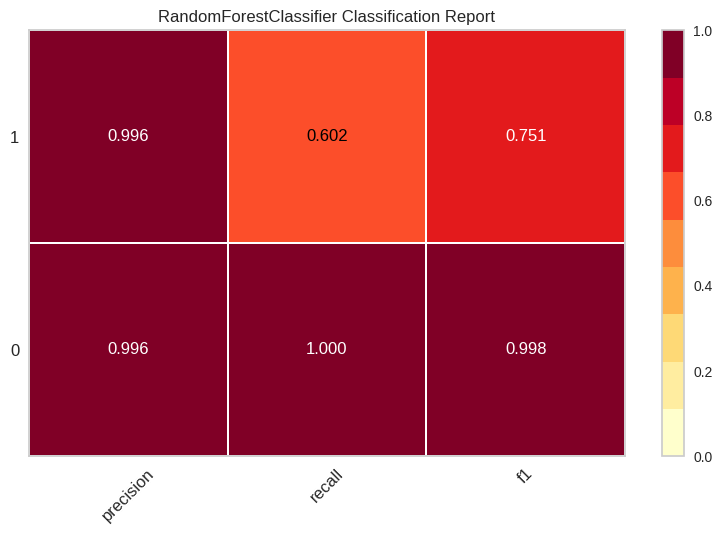

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [32]:
#Classification Report
visualizer = ClassificationReport(rf)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

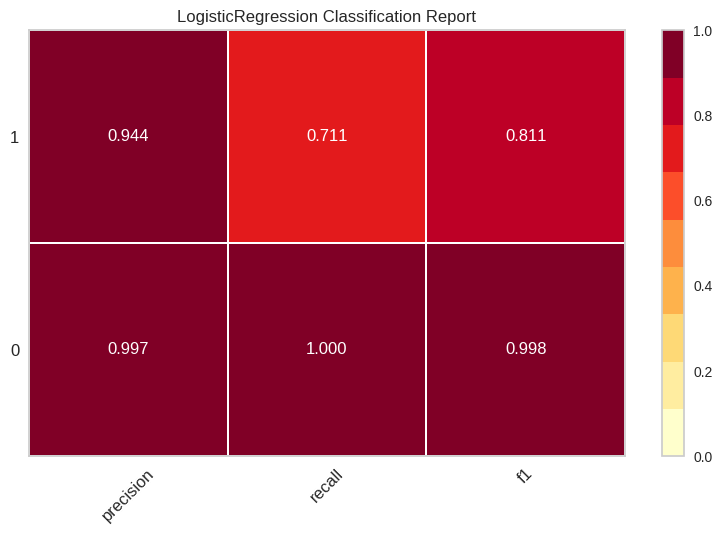

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [33]:
visualizer = ClassificationReport(logit)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

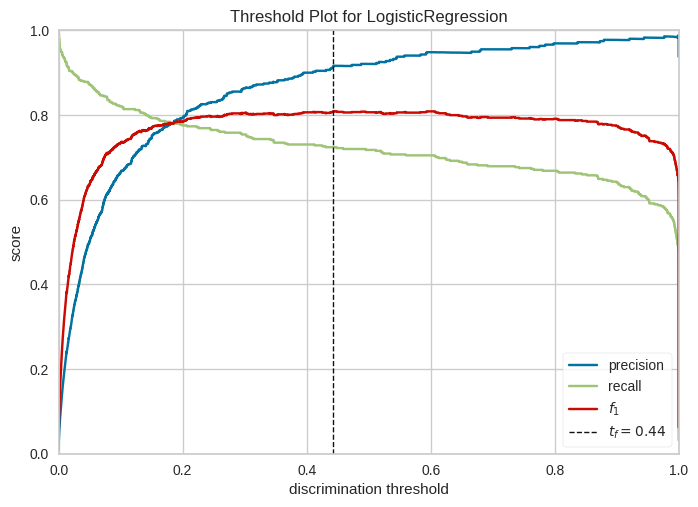

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [34]:
#Precision and Recall, vs probability threshold
visualizer = DiscriminationThreshold(logit,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [36]:
#Confusion Matrix for Baseline model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_base, labels=[0,1])

array([[43321,     0],
       [  405,     0]])

In [37]:
#Confusion Matrix for random forest model
confusion_matrix(y_test, rf.predict(X_test), labels=[0,1])

array([[43320,     1],
       [  161,   244]])

In [38]:
confusion_matrix(y_test, logit.predict(X_test), labels=[0,1])

array([[43304,    17],
       [  117,   288]])

In [39]:
#FPR and FNR
tn, fp, fn, tp = confusion_matrix(y_test, y_test_base, labels=[0,1]).ravel()

FPR = fp / (tn + fp)

FNR = fn / (tp + fn)

print('False Positive Rate, baseline: ', FPR)
print('False Negative Rate, baseline: ', FNR)

False Positive Rate, baseline:  0.0
False Negative Rate, baseline:  1.0


In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(X_test), labels=[0,1]).ravel()

FPR = fp / (tn + fp)

FNR =  fn / (tp + fn)

print('False Positive Rate, Random Forests: ', FPR)
print('False Negative Rate, Random Forests: ', FNR)

False Positive Rate, Random Forests:  2.3083492994159875e-05
False Negative Rate, Random Forests:  0.39753086419753086


In [41]:
tn, fp, fn, tp = confusion_matrix(y_test, logit.predict(X_test), labels=[0,1]).ravel()

FPR = fp / (tn + fp)

FNR =  fn / (tp + fn)

print('False Positive Rate, Logistic Regression: ', FPR)
print('False Negative Rate, Logistic Regression: ', FNR)

False Positive Rate, Logistic Regression:  0.0003924193809007179
False Negative Rate, Logistic Regression:  0.28888888888888886


In [42]:
#FPR and FNR vs probability threshold
thresholds = np.linspace(0, 1, 100)
thresholds

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [43]:
fpr_ls = []
fnr_ls = []

# obtain probabilities
probs = logit.predict_proba(X_test)[:,1]

for threshold in thresholds:

    # obtain class prediction based on threshold
    preds = np.where(probs>=threshold, 1, 0)

    # obtain confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, preds, labels=[0,1]).ravel()

    #  obtain FRP and FNR
    FPR = fp / (tn + fp)
    FNR =  fn / (tp + fn)

    fpr_ls.append(FPR)
    fnr_ls.append(FNR)

metrics = pd.concat([
    pd.Series(fpr_ls),
    pd.Series(fnr_ls)], axis=1)

metrics.columns = ['fpr', 'fnr']
metrics.index = thresholds

metrics.head()

,fpr,fnr
0.000000,1.000000,0.000000
0.010101,0.040073,0.064198
0.020202,0.020290,0.083951
0.030303,0.013204,0.098765
0.040404,0.009741,0.125926


Text(0.5, 1.0, 'FPR and FNR vs Discriminant Threshold')

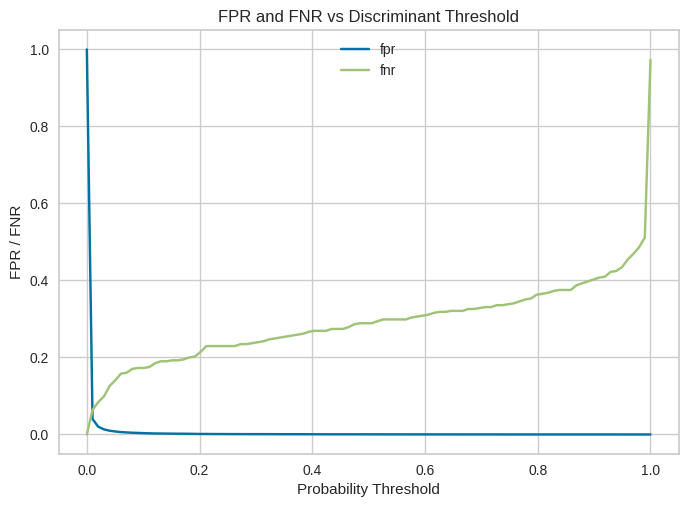

In [45]:
import matplotlib.pyplot as plt
metrics.plot()
plt.xlabel('Probability Threshold')
plt.ylabel('FPR / FNR')
plt.title('FPR and FNR vs Discriminant Threshold')

In [46]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

In [47]:
#Balanced Accuracy
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, Random Forest test:', balanced_accuracy_score(y_test, rf.predict(X_test)))
print('Balanced accuracy, Regression test:',  balanced_accuracy_score(y_test, logit.predict(X_test)))

Balanced accuracy, Baseline test:  0.5
Balanced accuracy, Random Forest test: 0.8012230261547375
Balanced accuracy, Regression test: 0.8553593458651052


In [49]:
#Recall per class
# with the below parameters in the recall_score function we can obtain the recall in each class:

print('Recall, class 0 and 1: ', recall_score(
    y_test, y_test_base, labels=[0,1], average=None))

print('Recall, class 0 and 1:', recall_score(
    y_test, rf.predict(X_test), labels=[0,1], average=None))

print('Recall, class 0 and 1:',  recall_score(
    y_test, logit.predict(X_test), labels=[0,1], average=None))

Recall, class 0 and 1:  [1. 0.]
Recall, class 0 and 1: [0.99997692 0.60246914]
Recall, class 0 and 1: [0.99960758 0.71111111]


In [50]:
#Recall
print('Recall Baseline test: ', recall_score(y_test, y_test_base, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test, logit.predict(X_test), pos_label=1))

Recall Baseline test:  0.0
Recall Random Forest test: 0.6024691358024692
Recall Logistic Regression test: 0.7111111111111111


In [51]:
#TNR (Equivalent of Recall but for majority class)
print('TNR Baseline test: ', recall_score(y_test, y_test_base, pos_label=0))
print('TNR Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=0))
print('TNR Logistic Regression test:', recall_score(y_test, logit.predict(X_test), pos_label=0))

TNR Baseline test:  1.0
TNR Random Forest test: 0.9999769165070058
TNR Logistic Regression test: 0.9996075806190993


In [53]:
from imblearn.metrics import (
    geometric_mean_score,
    make_index_balanced_accuracy,
)

In [54]:
#Geometric mean
print('G-Mean Baseline test: ', geometric_mean_score(y_test, y_test_base))
print('G-Mean Random Forest test:', geometric_mean_score(y_test, rf.predict(X_test)))
print('G-Mean Logistic Regression test:', geometric_mean_score(y_test, logit.predict(X_test)))

G-Mean Baseline test:  0.0
G-Mean Random Forest test: 0.7761798945543448
G-Mean Logistic Regression test: 0.8431085679372124


In [56]:
#Dominance= True Positive Rate - True Negative Rate
def dominance(y_true, y_pred):
    tpr = recall_score(y_test, y_pred, pos_label=1)
    tnr = recall_score(y_test, y_pred, pos_label=0)
    return tpr - tnr

In [57]:
print('Dominance Baseline test: ', dominance(y_test, y_test_base))
print('Dominance Random Forest test:', dominance(y_test, rf.predict(X_test)))
print('Dominance Logistic Regression test:', dominance(y_test, logit.predict(X_test)))

Dominance Baseline test:  -1.0
Dominance Random Forest test: -0.39750778070453663
Dominance Logistic Regression test: -0.28849646950798813


Text(0.5, 1.0, 'Metrics vs Discriminant Threshold')

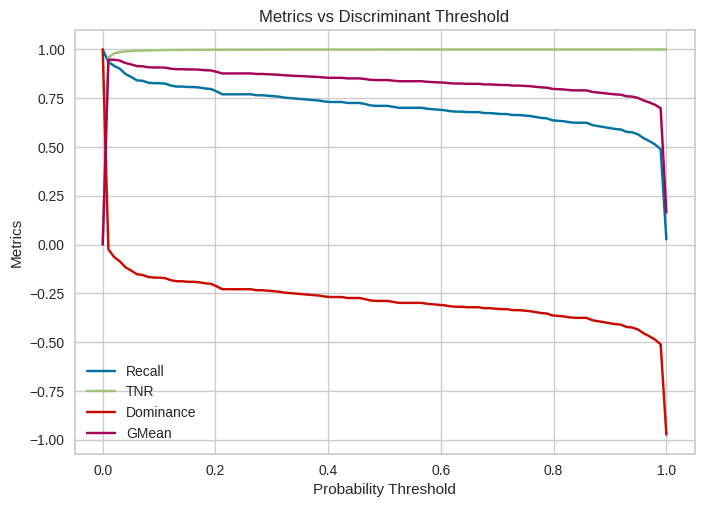

In [58]:
#Metrics vs Threshold
# list of thresholds
thresholds = np.linspace(0, 1, 100)

# list co collect values
recall_ls = []
tnr_ls = []
dominance_ls = []
gmean_ls = []

# obtain probabilities
probs_logit = logit.predict_proba(X_test)[:, 1]

# calculate G-Mean based on thresholds
for threshold in thresholds:

    # obtain class prediction based on threshold
    preds_logit = np.where(probs_logit >= threshold, 1, 0)

    # obtain metrics
    recall_ls.append(recall_score(y_test, preds_logit, pos_label=1))
    tnr_ls.append((recall_score(y_test, preds_logit, pos_label=0)))
    dominance_ls.append(dominance(y_test, preds_logit))
    gmean_ls.append(geometric_mean_score(y_test, preds_logit))


# after loop concatenate metrics
metrics = pd.concat([
    pd.Series(recall_ls),
    pd.Series(tnr_ls),
    pd.Series(dominance_ls),
    pd.Series(gmean_ls)], axis=1)

# add column names and thresholds in index
metrics.columns = ['Recall', 'TNR', 'Dominance', 'GMean']
metrics.index = thresholds

# plot
metrics.plot()
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics')
plt.title('Metrics vs Discriminant Threshold')

In [59]:
#Index of imbalanced Accuracy
#Geometric Mean
print('G-Mean Baseline test: ', geometric_mean_score(y_test, y_test_base))
print('G-Mean Random Forest test:', geometric_mean_score(y_test, rf.predict(X_test)))
print('G-Mean Logistic Regression test:', geometric_mean_score(y_test, logit.predict(X_test)))

G-Mean Baseline test:  0.0
G-Mean Random Forest test: 0.7761798945543448
G-Mean Logistic Regression test: 0.8431085679372124


In [60]:
gmean = make_index_balanced_accuracy(alpha=0.5, squared=True)(geometric_mean_score)

print('Corrected G-Mean Baseline test: ', gmean(y_test, y_test_base))
print('Corrected G-Mean Random Forest test:', gmean(y_test, rf.predict(X_test)))
print('Corrected G-Mean Logistic Regression test:', gmean(y_test, logit.predict(X_test)))

Corrected G-Mean Baseline test:  0.0
Corrected G-Mean Random Forest test: 0.6024552287103938
Corrected G-Mean Logistic Regression test: 0.7108320573291372


In [61]:
#Accuracy
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
print('Accuracy Logistic Regression test:', accuracy_score(y_test, logit.predict(X_test)))

Accuracy Baseline test:  0.9907377761514888
Accuracy Random Forest test: 0.9962951104605955
Accuracy Logistic Regression test: 0.9969354617390112


In [62]:
acc = make_index_balanced_accuracy(alpha=0.5, squared=True)(accuracy_score)

print('Corrected Accuracy Baseline test: ', acc(y_test, y_test_base))
print('Corrected Accuracy Random Forest test:', acc(y_test, rf.predict(X_test)))
print('Corrected Accuracy Logistic Regression test:', acc(y_test, logit.predict(X_test)))

Corrected Accuracy Baseline test:  0.4907806705467988
Corrected Accuracy Random Forest test: 0.7953200510570445
Corrected Accuracy Logistic Regression test: 0.8505148338956338


In [64]:
from sklearn.metrics import (
    roc_auc_score,
    RocCurveDisplay,
)

In [65]:
#ROC AUC
print('ROC-AUC Baseline test: ', roc_auc_score(y_test, y_test_base))
print('ROC-AUC Random Forest test:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print('ROC-AUC Logistic Regression test:', roc_auc_score(y_test, logit.predict_proba(X_test)[:,1]))

ROC-AUC Baseline test:  0.5
ROC-AUC Random Forest test: 0.9433902127699593
ROC-AUC Logistic Regression test: 0.9899652921159041


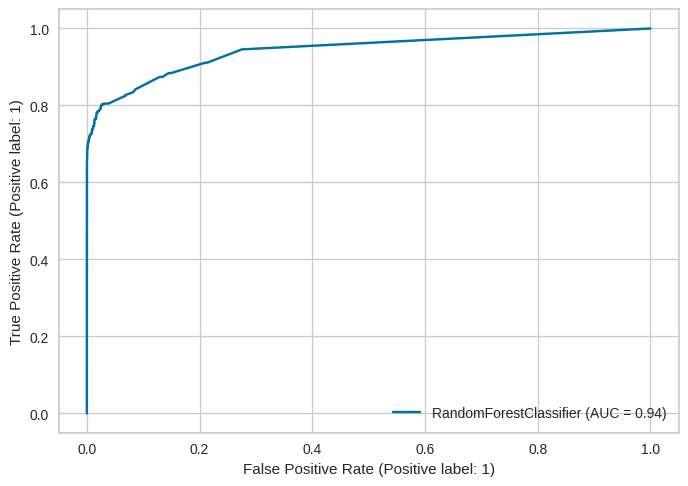

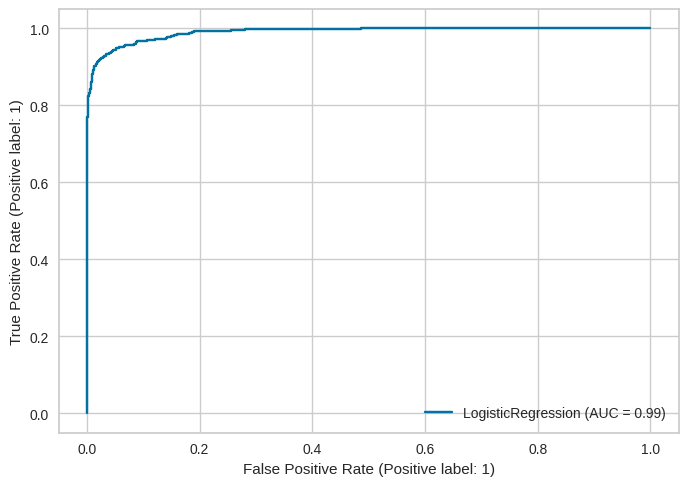

In [66]:
#Plot ROC AUC
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)
logit_disp = RocCurveDisplay.from_estimator(logit, X_test, y_test)

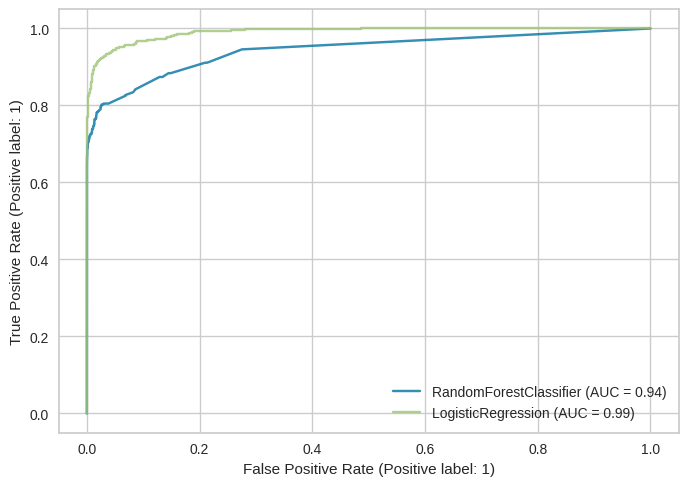

In [67]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
logit_disp.plot(ax=ax, alpha=0.8)

In [68]:
from sklearn.metrics import (
    precision_recall_curve,
    PrecisionRecallDisplay,
    average_precision_score,
    auc,
)


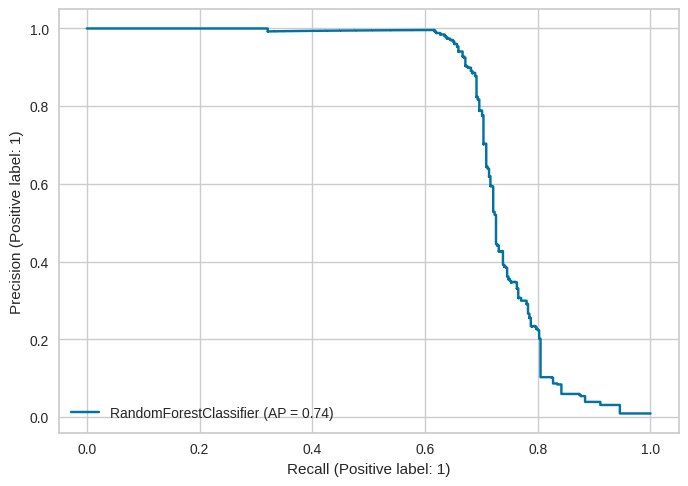

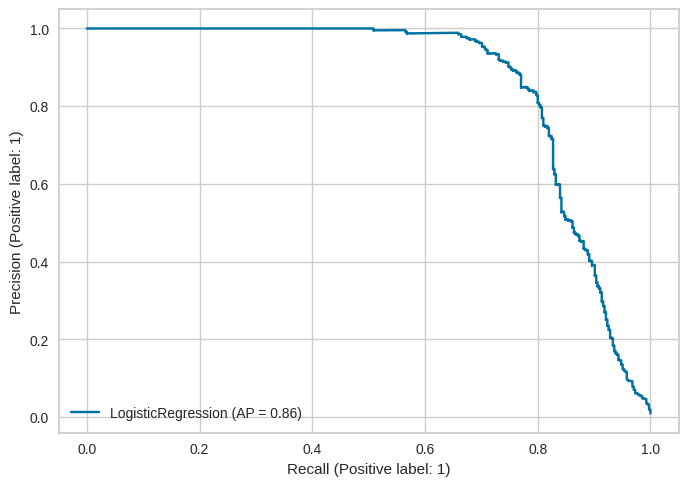

In [69]:
rf_disp = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
logit_disp = PrecisionRecallDisplay.from_estimator(logit, X_test, y_test)

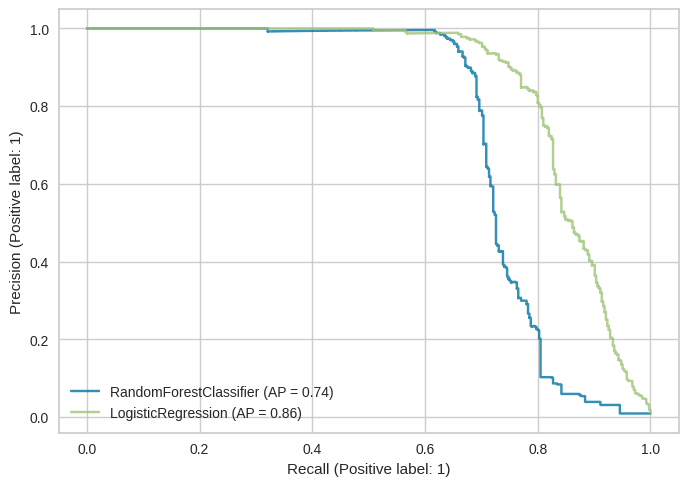

In [70]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
logit_disp.plot(ax=ax, alpha=0.8)

In [71]:
#Area under the PR curve
# random forests

# first find preciion and recall various at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_rf)

# then using these values, determine the area under the curve
auc_logit = auc(recall, precision)
print('Area under PR Curve Random Forests: ', auc_logit)

# logistic regression

# first find preciion and recall various at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_logit)

# then using these values, determine the area under the curve
auc_logit = auc(recall, precision)
print('Area under PR Curve Logistic Regression: ', auc_logit)

Area under PR Curve Random Forests:  0.7455492886184477
Area under PR Curve Logistic Regression:  0.8594122801589587


In [72]:
#Average precision score
# random forests
ap_rf = average_precision_score(y_test, y_test_rf)
print('Average Precision Random Forests: ', ap_rf)

# logistic regression
ap_logit = average_precision_score(y_test, y_test_logit)
print('Average Precision Logistic Regression: ', ap_logit)

Average Precision Random Forests:  0.7435373757327486
Average Precision Logistic Regression:  0.8594858653965165


In [75]:
from imblearn.under_sampling import RandomUnderSampler

In [76]:
#Random undersampling
rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only from majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [77]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((1782, 74), (1782,))

In [ ]:
# number of positive class in original dataset
y_train.value_counts()

In [79]:
# final data size is 2 times the number of observations
# with positive class:

y_train.value_counts()[1] * 2

1782

In [81]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

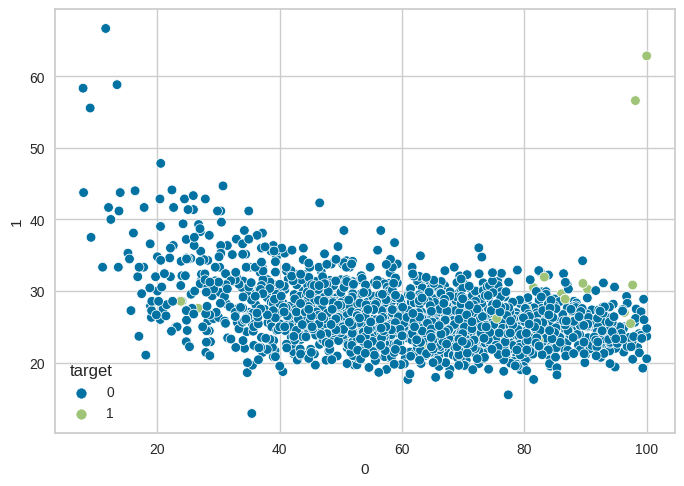

In [82]:
#Plot data
sns.scatterplot(data=data.sample(1784, random_state=0),
                x="0",
                y="1",
                hue="target")

<Axes: xlabel='0', ylabel='1'>

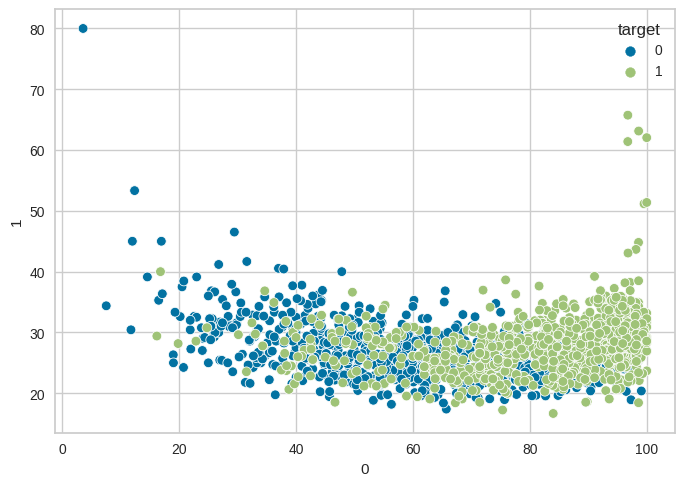

In [83]:
col_names = [str(i) for i in range(74)] +['target']

data_resampled = pd.concat([X_resampled, y_resampled], axis=1)
data_resampled.columns = col_names

sns.scatterplot(data=data_resampled, x="0", y="1", hue="target")

The distributions are similar to that of the original data. The reason you see more purple dots, is because now they are not covered by the pink ones.

<Axes: xlabel='4', ylabel='5'>

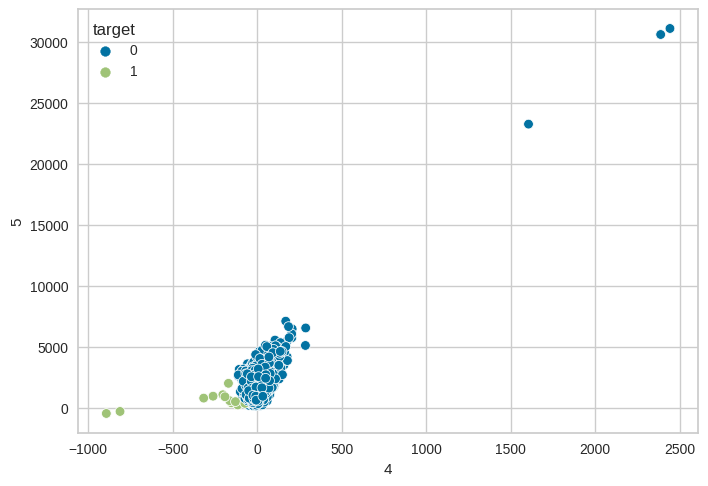

In [84]:
sns.scatterplot(data=data.sample(1784, random_state=0),
                x="4",
                y="5",
                hue="target")

In [85]:
#Comparing machine learning performance with and without undersampling
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [86]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9736769545142595
Test set
Random Forests roc-auc: 0.9724711107235364


In [87]:
# evaluate performance of algorithm built
# using undersampled dataset

run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.9937622893103626
Test set
Random Forests roc-auc: 0.9876831611048272


We see a huge jump in model performance.

In [95]:
data=data.sample(10000)
# imbalanced target
data.target.value_counts() / len(data)

0    0.9929
1    0.0071
Name: target, dtype: float64

In [96]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [97]:
#Tomek Links
from imblearn.under_sampling import TomekLinks

In [98]:
# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

In [99]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((6995, 74), (6995,))

In [100]:
# number of positive class in original dataset
y_train.value_counts()

0    6950
1      50
Name: target, dtype: int64

Text(0.5, 1.0, 'Original data')

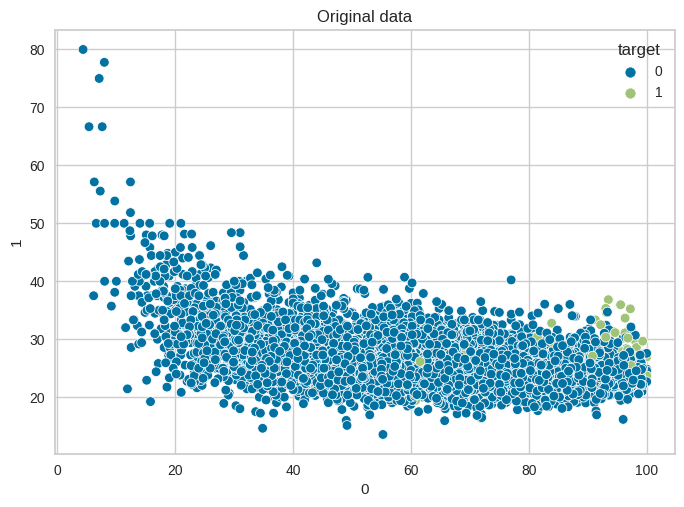

In [101]:
#Plot data
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

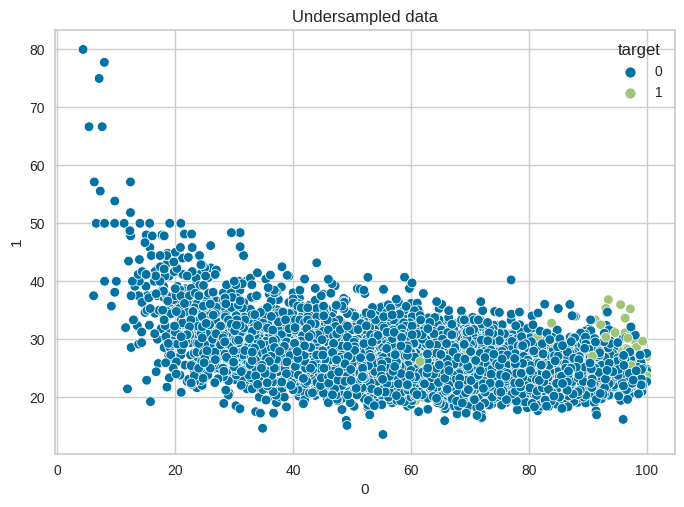

In [102]:
# undersampled data

sns.scatterplot(data=X_resampled,
                x="0",
                y="1",
                hue=y_resampled)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

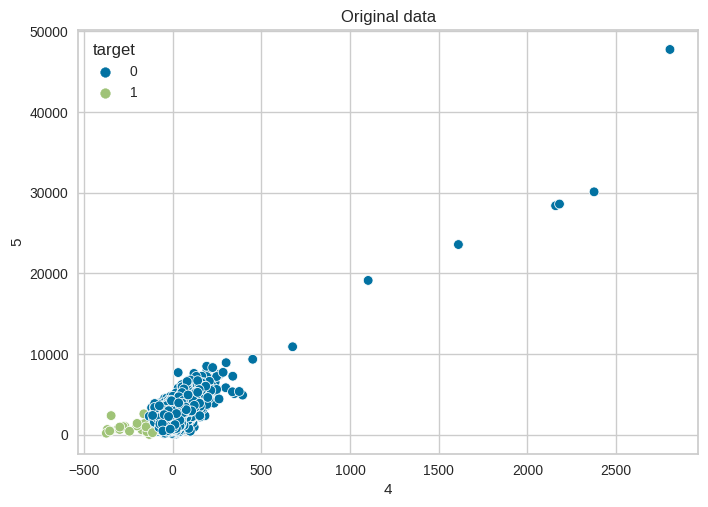

In [103]:
# original data

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

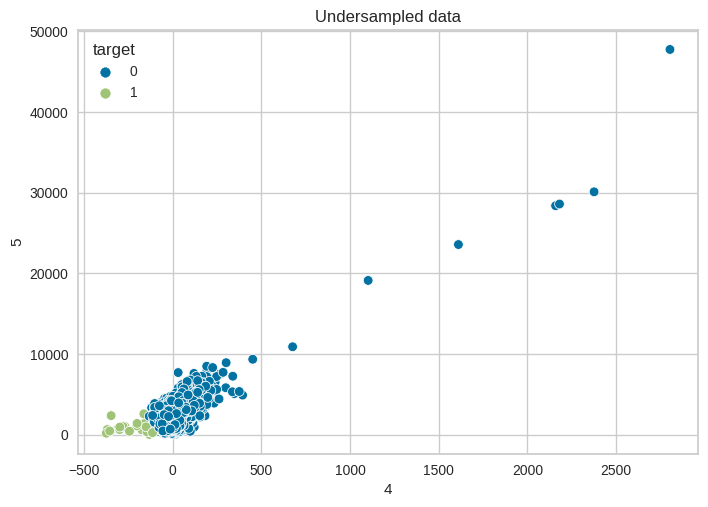

In [104]:
sns.scatterplot(data=X_resampled,
                x="4",
                y="5",
                hue=y_resampled)

plt.title('Undersampled data')

In [107]:
#Comparing machine learning performance with and without undersampling
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9972172661870504
Test set
Random Forests roc-auc: 0.9978740069374511


In [108]:
# evaluate performance of algorithm built
# using undersampled dataset

run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.997163426925846
Test set
Random Forests roc-auc: 0.9925030770952221


In [110]:
#One sided selection
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,  # for reproducibility
    n_neighbors=1,# default
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = oss.fit_resample(X_train, y_train)

In [111]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((6091, 74), (6091,))

In [112]:
# number of positive class in original dataset
y_train.value_counts()

0    6950
1      50
Name: target, dtype: int64

Text(0.5, 1.0, 'Original data')

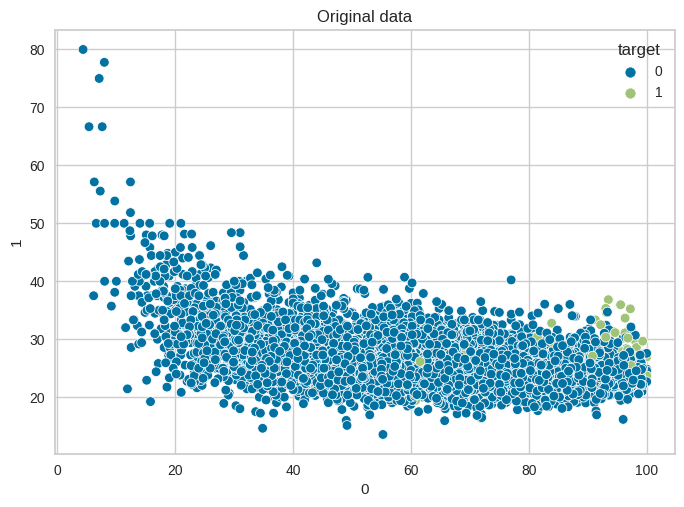

In [113]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

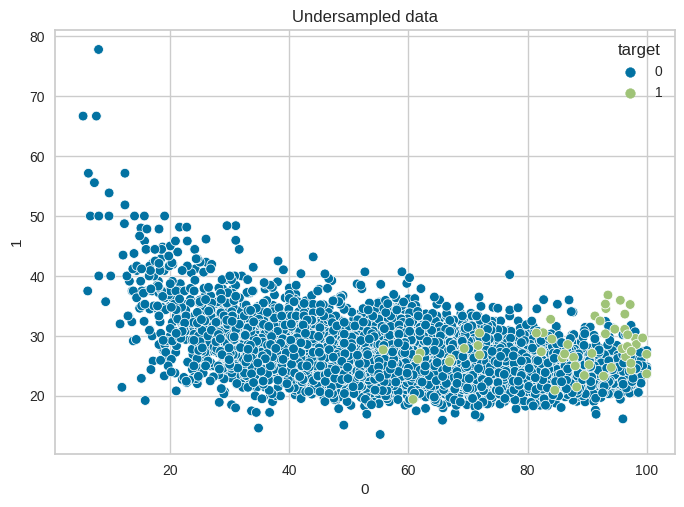

In [114]:
# undersampled data

sns.scatterplot(data=X_resampled,
                x="0",
                y="1",
                hue=y_resampled)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

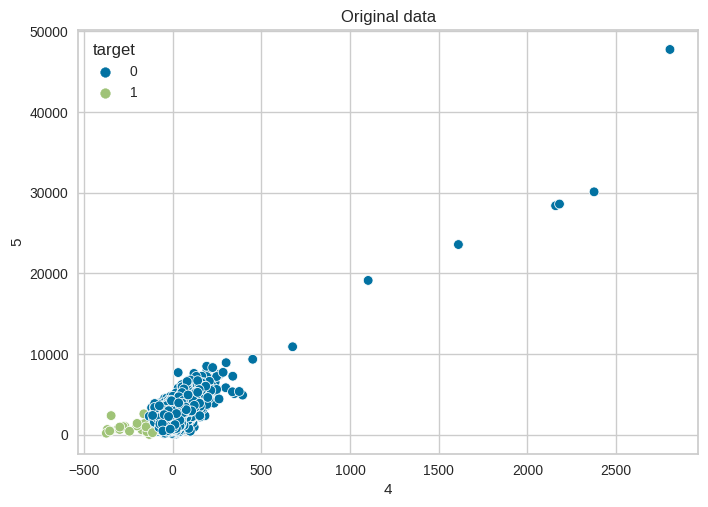

In [115]:
# original data

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

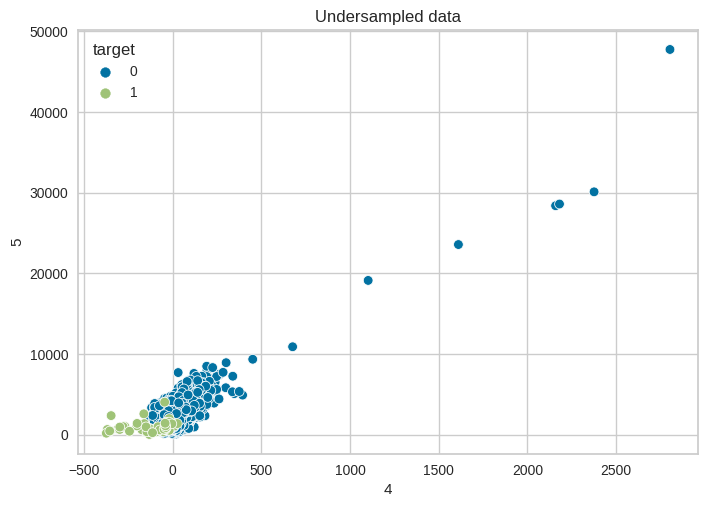

In [116]:
sns.scatterplot(data=X_resampled,
                x="4",
                y="5",
                hue=y_resampled)

plt.title('Undersampled data')

In [117]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9972172661870504
Test set
Random Forests roc-auc: 0.9978740069374511


In [118]:
# evaluate performance of algorithm built
# using undersampled dataset

run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.9978116205926171
Test set
Random Forests roc-auc: 0.9854697165875413


In [119]:
# edited nearest neighbours
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(
    sampling_strategy='auto',  # resamples the majority class
    n_neighbors=3, # the number of neighbours to examine to remove an observation
    kind_sel='all',  # all neighbours need to agree
    n_jobs=4)  # I have 4 cores in my laptop

X_enn, y_enn = enn.fit_resample(X_train, y_train)

In [120]:
# compare shapes

X_train.shape, X_enn.shape

((7000, 74), (6968, 74))

Text(0.5, 1.0, 'Original data')

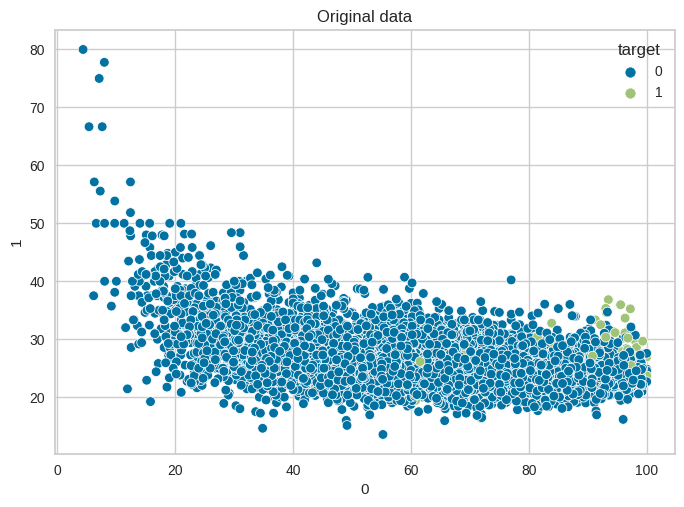

In [121]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Edited NN data')

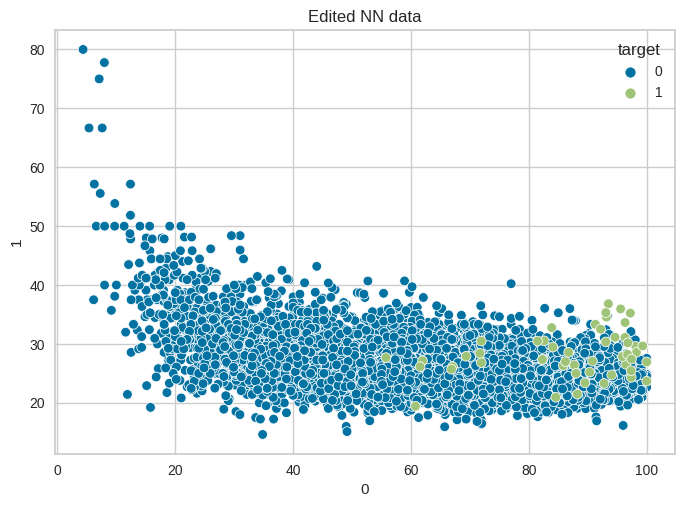

In [122]:
# enn undersampled data

sns.scatterplot(data=X_enn,
                x="0",
                y="1",
                hue=y_enn)

plt.title('Edited NN data')

Text(0.5, 1.0, 'Original data')

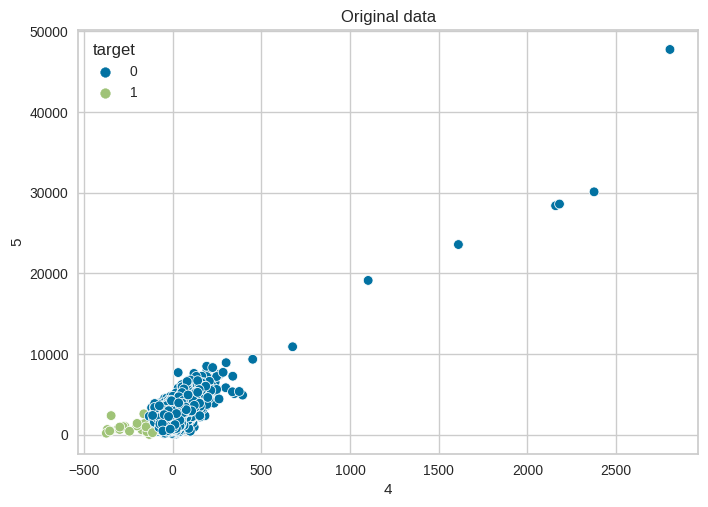

In [123]:
# original data, other set of variables

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Edited NN data')

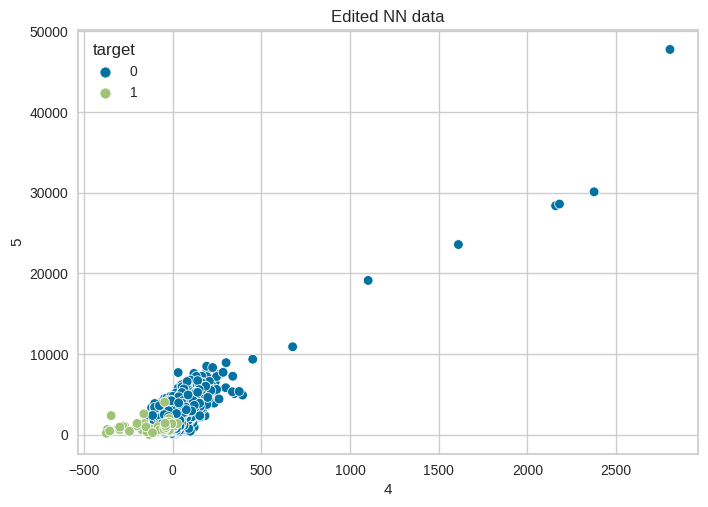

In [124]:
# enn undersampled data

sns.scatterplot(data=X_enn,
                x="4",
                y="5",
                hue=y_enn)

plt.title('Edited NN data')

In [125]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9972172661870504
Test set
Random Forests roc-auc: 0.9978740069374511


In [126]:
# evaluate performance of algorithm built
# using enn undersampled dataset

run_randomForests(X_enn,
                  X_test,
                  y_enn,
                  y_test)

Train set
Random Forests roc-auc: 0.9940315119976871
Test set
Random Forests roc-auc: 0.9979859013091641
